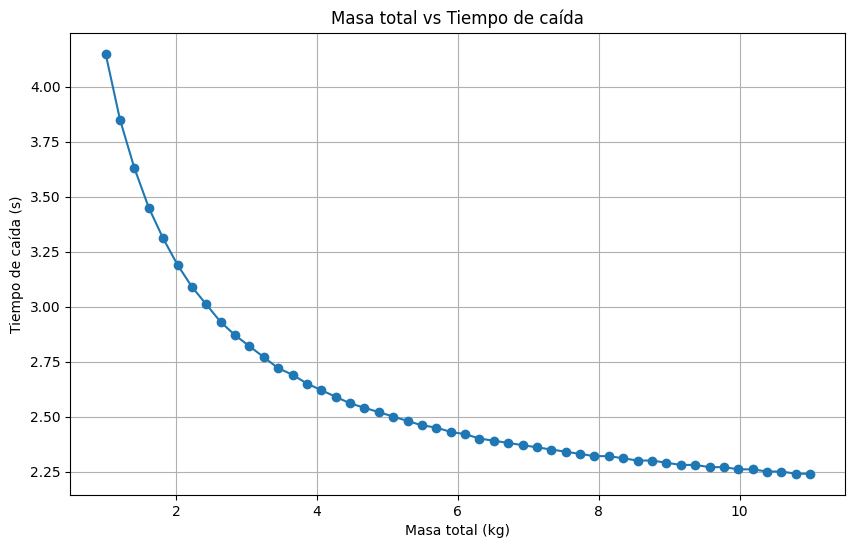

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


g = 9.81
theta = np.radians(30)
gamma = 0.7
H = 10


def equation(t, v, m_total):
    return g * np.sin(theta) - (gamma / m_total) * v**2


def tiempo_de_caida(m, M):
    m_total = m + M
    v0 = 0
    t_eval = np.linspace(0, 100, 10000)

    sol = solve_ivp(equation, [0, 100], [v0], args=(m_total,), t_eval=t_eval)


    y = H - np.cumsum(sol.y[0]) * (t_eval[1] - t_eval[0])

    tiempo_caida = t_eval[np.where(y <= 0)[0][0]]
    return tiempo_caida

m = 1.0
masas = np.linspace(0, 10, 50)
tiempos = []

for M in masas:
    t_caida = tiempo_de_caida(m, M)
    tiempos.append(t_caida)


plt.figure(figsize=(10, 6))
plt.plot(masas + m, tiempos, marker='o')
plt.xlabel('Masa total (kg)')
plt.ylabel('Tiempo de caída (s)')
plt.title('Masa total vs Tiempo de caída')
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'carro.png'

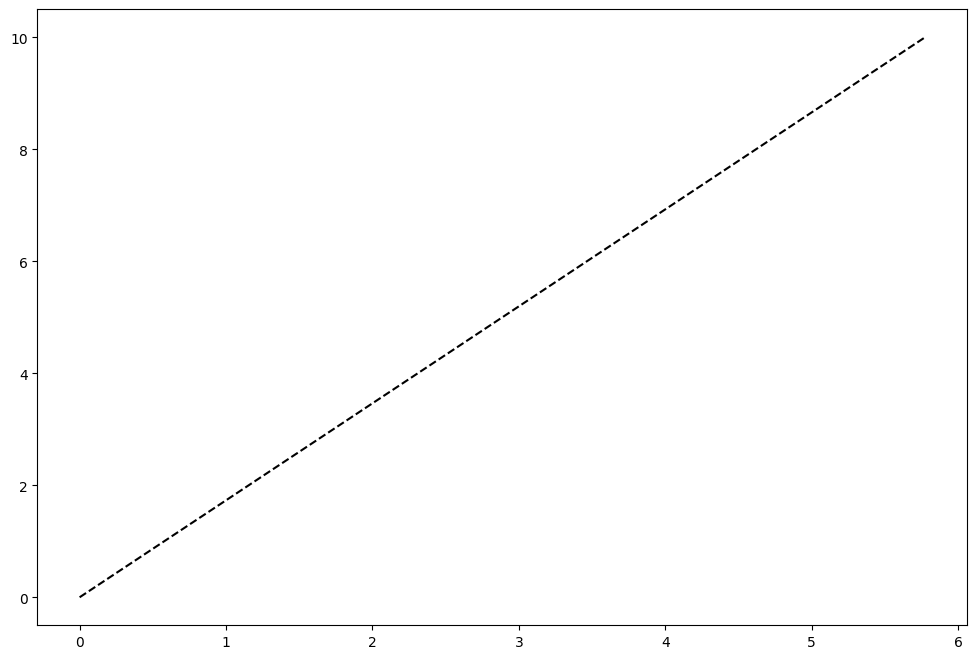

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from IPython.display import clear_output
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Constantes
g = 9.81
angulo = np.radians(30)
c = 0.7
h = 10
dt = 0.05

# Ecuaciones de movimiento
def eq_movimiento(t, v, M):
    return g * np.sin(angulo) - (c / M) * (v**2)

# Simulación de caída
def eq_caida(m_1, m_2):
    masa_total = m_1 + m_2
    v_0 = 0
    t_eval = np.arange(0, 100, dt)
    sol = solve_ivp(eq_movimiento, [0, 100], [v_0], args=(masa_total,), t_eval=t_eval)
    y = h - np.cumsum(sol.y[0]) * dt
    x = y * np.tan(angulo)
    tiempo_en_la_caida = t_eval[np.where(y <= 0)[0][0]]
    return x, y, tiempo_en_la_caida, sol.t

# Generar datos para diferentes masas
masa_carro = 1.0
masas_agregadas = np.linspace(0, 10, 20)
trayectorias = []
for masa_agregada in masas_agregadas:
    x, y, tiempo_en_la_caida, t = eq_caida(masa_carro, masa_agregada)
    trayectorias.append((x, y, t, masa_carro + masa_agregada))

# Función para cargar la imagen del carro y cambiar el color
def get_colored_car_image(masa, max_masa):
    img = plt.imread("carro.png")
    color = plt.cm.plasma(masa / max_masa)  # Cambiado a 'plasma'
    img_normalized = img[:, :, :3] / img[:, :, :3].max()
    coloured_img = img_normalized * color[:3]
    alpha_channel = img[:, :, 3]
    coloured_img = np.dstack((coloured_img, alpha_channel))
    return OffsetImage(coloured_img, zoom=0.05)

# Animación de la caída
def animar_carros(trayectorias):
    plt.figure(figsize=(12, 8))
    plt.plot([0, max([max(x) for x, _, _, _ in trayectorias])], [h, 0], 'k--')  # Línea del plano inclinado

    max_masa = max([masa for _, _, _, masa in trayectorias])
    colormap = plt.cm.get_cmap('plasma')  # Cambiado a 'plasma'

    for i in range(len(trayectorias[0][2])):
        clear_output(wait=True)
        plt.cla()  # Limpiar el gráfico actual

        # Dibujar plano inclinado
        plt.plot([0, max([max(x) for x, _, _, _ in trayectorias])], [0, h], 'k--')

        # Añadir la imagen del carro con el color correspondiente a la masa
        for (x, y, t, masa) in trayectorias:
            if i < len(x):
                ab = AnnotationBbox(get_colored_car_image(masa, max_masa), (x[i], y[i]), frameon=False)
                plt.gca().add_artist(ab)

        # Mostrar barra de colores
        sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=max_masa))  # Cambiado a 'plasma'
        sm.set_array([])
        plt.colorbar(sm, label='Masa (kg)')

        # Mostrar temporizador
        tiempo_actual = i * dt
        plt.text(0.5, h * 1.05, f'Tiempo: {tiempo_actual:.2f} s', ha='center', va='bottom', fontsize=12)

        plt.xlim(0, max([max(x) for x, _, _, _ in trayectorias]))
        plt.ylim(0, h)
        plt.title('Caída de carros en un plano inclinado')
        plt.xlabel('Posición horizontal (m)')
        plt.ylabel('Altura (m)')
        plt.pause(0.01)
        plt.show()

# Ejecutar animación
animar_carros(trayectorias)



***Punto 2***

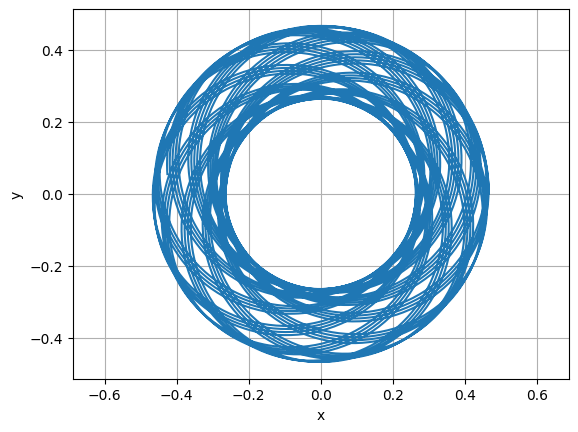

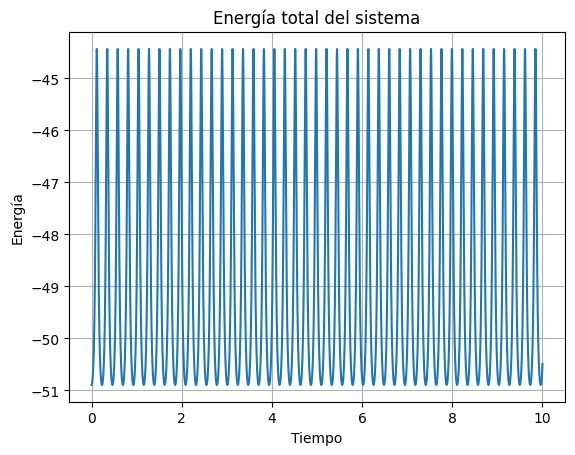

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


mu = 39.4234021
alfa = 1.09778201e-2
a = 0.38709893
e = 0.20563069


x0 = a * (1 + e)
y0 = 0
vx0 = 0
vy0 = np.sqrt(mu / a * (1 - e) / (1 + e))


def orbita_mercurio(t, y):
    x, y, vx, vy = y
    r = np.sqrt(x**2 + y**2)
    factor = 1 + alfa / r**2
    ax = -mu * x / r**3 * factor
    ay = -mu * y / r**3 * factor
    return [vx, vy, ax, ay]


y0 = [x0, y0, vx0, vy0]

t_span = (0., 10.)
t = np.linspace(0, 10, 10000)


sol = solve_ivp(orbita_mercurio, t_span, y0, method='RK45', t_eval=t, max_step =10**(-3))


plt.plot(sol.y[0], sol.y[1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.show()


r = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
v2 = sol.y[2]**2 + sol.y[3]**2
energia_total = 0.5 * v2 - mu / r + alfa / (2 * r**2)


plt.plot(sol.t, energia_total)
plt.title('Energía total del sistema')
plt.xlabel('Tiempo')
plt.ylabel('Energía')
plt.grid(True)
plt.show()

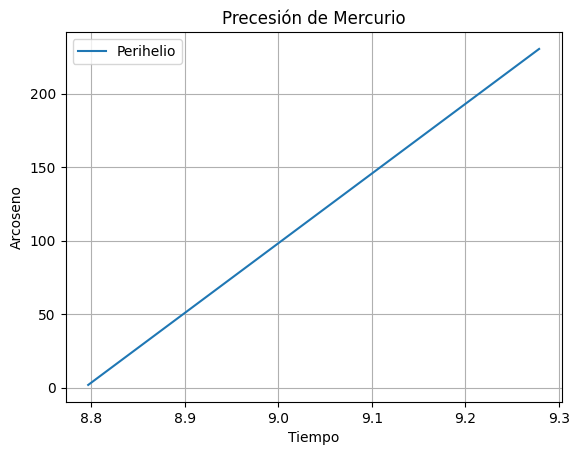

Precesión calculada: 474.2120954700323
Precesión observada: 42.9799


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

mu = 39.4234021
c = 1731459.13
alfa = 2 * mu / c**2

a = 0.38709893
e = 0.20563069

x0 = a * (1 + e)
y0 = 0
vx0 = 0
vy0 = np.sqrt(mu / a * (1 - e) / (1 + e))

def orbita_mercurio(t, y):
    x, y, vx, vy = y
    r = np.sqrt(x**2 + y**2)
    factor = 1 + alfa / r**2
    ax = -mu * x / r**3 * factor
    ay = -mu * y / r**3 * factor
    return [vx, vy, ax, ay]

y0 = [x0, y0, vx0, vy0]

t_span = (0., 10.)
t = np.linspace(0, 10, 10000) # Increased the time span to 100

sol = solve_ivp(orbita_mercurio, t_span, y0, method='RK45', t_eval=t, max_step =10**(-3))

x = sol.y[0]
y = sol.y[1]
vx = sol.y[2]
vy = sol.y[3]

r_dot_v = x * vx + y * vy

per_af = np.where(np.abs(r_dot_v) < 1e-3)[0]

angulos = np.arctan2(y[per_af], x[per_af])
grados = np.degrees(angulos)
grados[grados < 0] += 360

ang_per = grados[grados > 180] - 180
ang_af = grados[grados <= 180]

perihelio_arcsec = ang_per * 3600
afelio_arcsec = ang_af * 3600

perihelio_tiempo = sol.t[per_af[grados > 180]]
afelio_tiempo = sol.t[per_af[grados <= 180]]

plt.plot(perihelio_tiempo, perihelio_arcsec, label='Perihelio')
plt.title('Precesión de Mercurio')
plt.xlabel('Tiempo')
plt.ylabel('Arcoseno')
plt.grid(True)
plt.legend()
plt.show()

precesion_per_s = np.polyfit(perihelio_tiempo, perihelio_arcsec, 1)[0]

precesion_observada = 42.9799

print(f"Precesión calculada: {precesion_per_s}")
print(f"Precesión observada: {precesion_observada}")


<ipython-input-14-e77a5cd1c186>:17: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(x*2 + y*2)


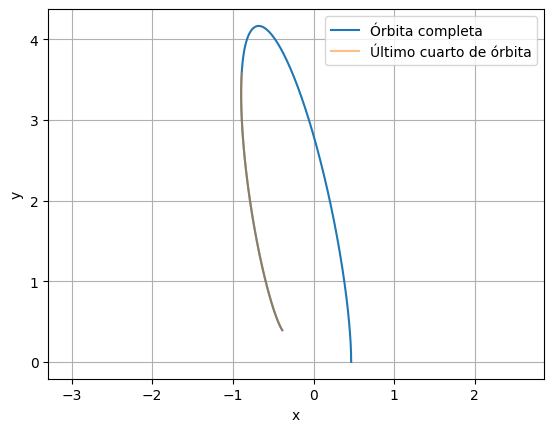

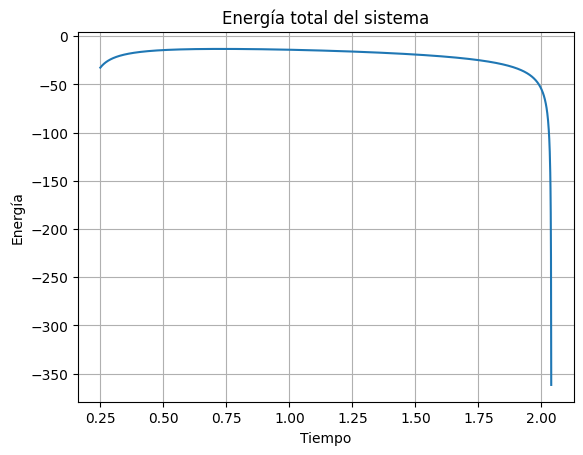

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

mu = 39.4234021
alfa = 1e-2  # Exagerar el efecto relativista
a = 0.38709893
e = 0.20563069

x0 = a * (1 + e)
y0 = 0
vx0 = 0
vy0 = np.sqrt(mu / a * (1 - e) / (1 + e))

def orbita_mercurio(t, y):
    x, y, vx, vy = y
    r = np.sqrt(x*2 + y*2)
    factor = 1 + alfa / r**2
    ax = -mu * x / r**3 * factor
    ay = -mu * y / r**3 * factor
    return [vx, vy, ax, ay]

y0 = [x0, y0, vx0, vy0]


t_start = 0.25
t_span = (t_start, 10.)
t = np.linspace(t_start, 10, 10000)

sol = solve_ivp(orbita_mercurio, t_span, y0, method='RK45', t_eval=t, max_step=1e-3)


plt.plot(sol.y[0], sol.y[1], label='Órbita completa')

quarter_orbit_index = int(len(sol.t) * 0.75)
quarter_x = sol.y[0][quarter_orbit_index:]
quarter_y = sol.y[1][quarter_orbit_index:]
plt.plot(quarter_x, quarter_y, label='Último cuarto de órbita', alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()


r = np.sqrt(sol.y[0]*2 + sol.y[1]*2)
v2 = sol.y[2]*2 + sol.y[3]*2
energia_total = 0.5 * v2 - mu / r + alfa / (2 * r**2)

plt.plot(sol.t, energia_total)
plt.title('Energía total del sistema')
plt.xlabel('Tiempo')
plt.ylabel('Energía')
plt.grid(True)
plt.show()

***PUNTO 3***

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

# Definir la ecuación diferencial: d²f/dx² + E*f = 0
def schrodinger(x, y, E):
    f, df = y
    return [df, -E*f]

# Definir la función para condiciones simétricas y antisimétricas
def solve_equation(E, symmetry_type='symmetric'):
    # Condiciones iniciales
    if symmetry_type == 'symmetric':
        y0 = [1, 0]  # f(0) = 1, f'(0) = 0
    elif symmetry_type == 'antisymmetric':
        y0 = [0, 1]  # f(0) = 0, f'(0) = 1
    else:
        raise ValueError("Symmetry type should be 'symmetric' or 'antisymmetric'.")

    # Resolver la ecuación diferencial
    sol = solve_ivp(schrodinger, [0, 6], y0, args=(E,), dense_output=True)

    # Retornar el valor de f(6) para verificar convergencia
    f6 = sol.y[0, -1]  # f(6)
    df6 = sol.y[1, -1]  # f'(6)
    return f6, df6, sol

# Función de disparo que encuentra la energía correcta
def find_energy(symmetry_type='symmetric'):
    def objective(E):
        f6, df6, _ = solve_equation(E, symmetry_type)
        return f6  # Buscamos que f(6) sea cercano a 0

    # Encontrar las energías para las que f(6) = 0
    energies = []
    for E_guess in np.linspace(0.1, 100, 50):  # Explorar valores de E
        try:
            result = root_scalar(objective, bracket=[E_guess, E_guess+1], method='brentq')
            energies.append(result.root)
        except ValueError:
            pass  # No se encontró una solución en este intervalo

    return energies

# Energías para la forma simétrica
energies_symmetric = find_energy('symmetric')

# Energías para la forma antisimétrica
energies_antisymmetric = find_energy('antisymmetric')

# Imprimir los resultados
print("Energías para la forma simétrica:", energies_symmetric[:5])
print("Energías para la forma antisimétrica:", energies_antisymmetric[:5])



Energías para la forma simétrica: [0.616551660720286, 8.2885173871046, 24.728101968019228, 49.9351080086444, 57.606861323368896]
Energías para la forma antisimétrica: [2.4661009149679383, 4.384022293617283, 6.850018516820229, 27.399375761754136, 33.15302994602115]


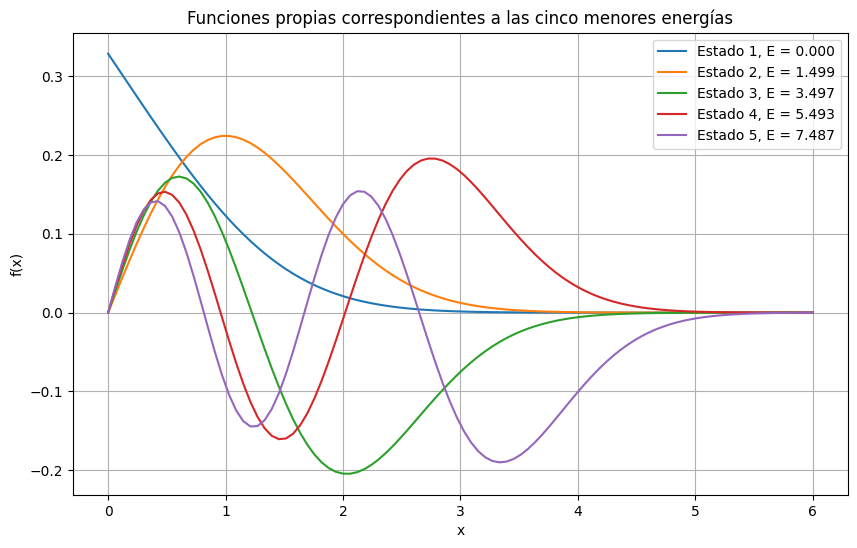

Cinco menores energías: [0.         1.49942584 3.49712799 5.49298916 7.48700801]


In [ ]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Definir el número de puntos y el espacio
N = 100  # Número de puntos en la grilla
x_min, x_max = 0, 6  # Limites del dominio
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]  # Tamaño de la grilla

# Matriz de diferencias finitas para la segunda derivada
L = np.zeros((N, N))
for i in range(1, N-1):
    L[i, i] = -2
    L[i, i-1] = 1
    L[i, i+1] = 1
L = L / dx**2

# Matriz identidad
I = np.eye(N)

# Definir la matriz S de la ecuación (1/2) (I * x^2 - L)
x_squared = np.diag(x**2)
S = (1/2) * (x_squared - L)

# Resolver el problema de autovalores y autovectores
energies, wavefunctions = eig(S)

# Tomar las energías reales (evitar valores imaginarios debido a errores numéricos)
energies = np.real(energies)

# Ordenar las energías y tomar las cinco más bajas
sorted_indices = np.argsort(energies)
lowest_energies = energies[sorted_indices][:5]
lowest_wavefunctions = wavefunctions[:, sorted_indices][:, :5]

# Graficar las cinco funciones propias correspondientes a las energías más bajas
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(x, lowest_wavefunctions[:, i], label=f'Estado {i+1}, E = {lowest_energies[i]:.3f}')
plt.title('Funciones propias correspondientes a las cinco menores energías')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

# Imprimir las cinco menores energías
print("Cinco menores energías:", lowest_energies)
